In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/dataset.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [4]:
data = females['Height']
low_end = 55.0
high_end = 56.0
mean = np.mean(data)
std = np.std(data)
minimum = np.min(data)
maximum = np.max(data)

In [5]:
x_range = np.linspace(minimum, maximum, 1000)
pdf = stats.norm.pdf(x_range, loc = mean, scale = std)
cdf = stats.norm.cdf(x_range, loc = mean, scale = std)

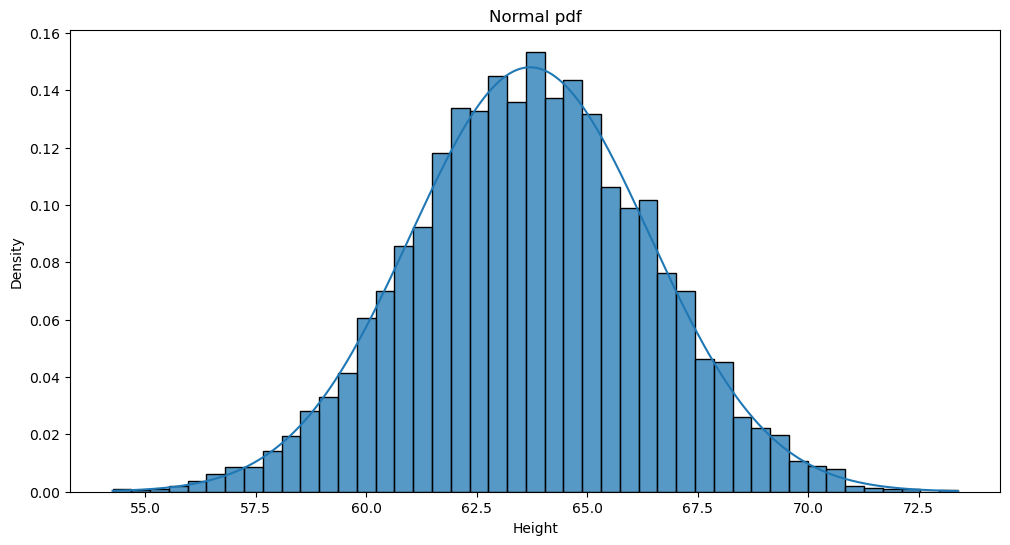

In [6]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = data, stat = 'density')
ax.plot(x_range, pdf)
ax.set_title('Normal pdf');

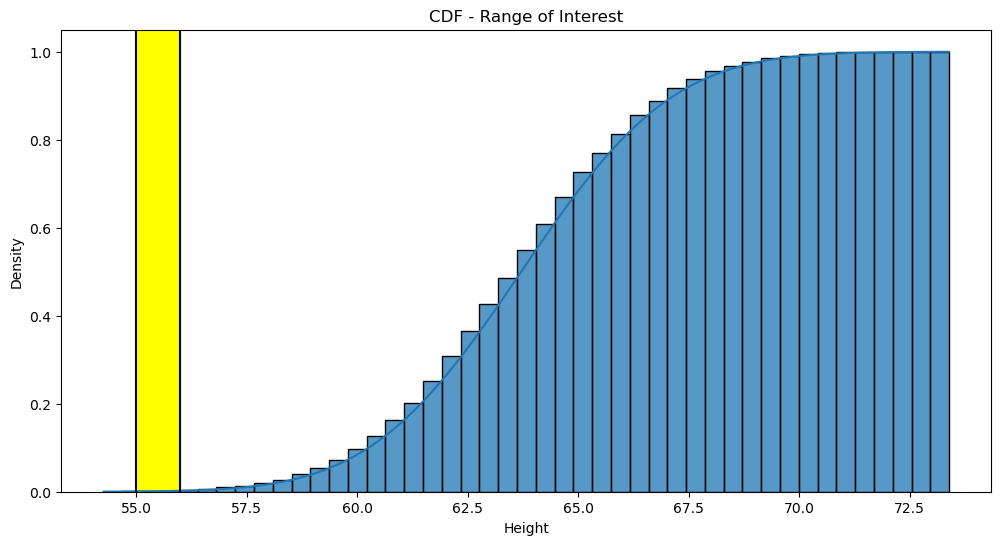

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = data, stat = 'density', cumulative = True)
ax.plot(x_range, cdf)
ax.axvline(low_end, color = 'black')
ax.axvline(high_end, color = 'black')
ax.axvspan(low_end, high_end, color = 'yellow', zorder = 0)
ax.set_title('CDF - Range of Interest');

In [8]:
high_prob = stats.norm.cdf(high_end, loc = mean, scale = std)
low_prob = stats.norm.cdf(low_end, loc = mean, scale = std)

high_prob - low_prob

0.0015043054289559897

In [9]:
stats.norm.cdf(60, loc = mean, scale = std)

0.08446492725207488

In [10]:
1 - stats.norm.cdf(mean, loc = mean, scale = std)

0.5